# AI Agents: Multi-Agent Architectures ( Part-7)

# Table of Contents
1. Introduction
- 1.1 Single-agent vs. Multi-agent Architectures
2. Multi-agent architectures
- 2.1 Patterns in Multi-agent Systems
  - 2.1.1 Parallel
  - 2.1.2 Sequential
  - 2.1.3 Loop
  - 2.1.4 Router
  - 2.1.5 Aggregator (or Synthesizer)
  - 2.1.6 Network (or Horizontal)
  - 2.1.7 Handoffs
  - 2.1.8 Supervisor
  - 2.1.9 Supervisor (tool-calling)
  - 2.1.10 Hierarchical (Or Vertical)
  - 2.1.11 Custom multi-agent workflow
3. Communication between agents
- 3.1 Graph state vs tool calls
- 3.2 Different state schemas
- 3.3 Shared message list
4. Conclusion

# 1. Introduction

- AI agent là hệ thống sử dụng LLM để điều khiển quyết định theo luồng của một ứng dụng
- Sự phức tạp của nó tăng lên theo thời gian, khiến chúng khó quản lý và mở rộng quy mô

Có thể sẽ gặp những trường hợp sau:
- Agent có quá nhiều công cụ theo ý nó và đưa ra quyết định kém về việc nên gọi công cụ nào tiếp theo
- Bối cảnh có thể trở nên quá phức tạp cho một agent để có thể theo dõi
- Cần có nhiều lĩnh vực chuyên môn trong hệ thống

=> Để giải quyết điều này, bạn có thể chia nhỏ chúng thành các nhiệm vụ con để giải quyết

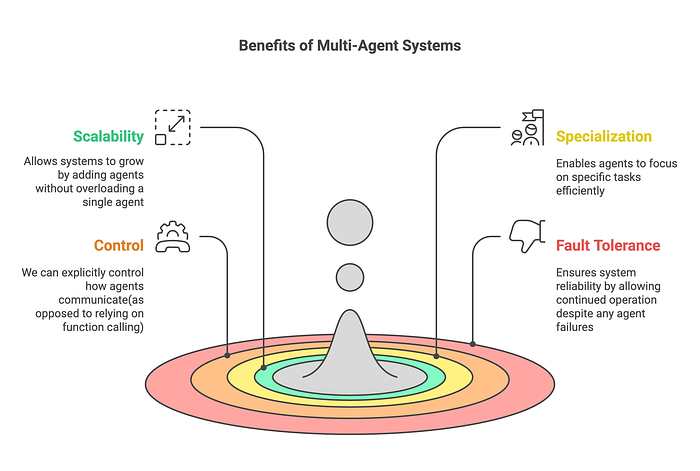

## 1.1 Single-agent vs. Multi-agent Architectures
- Hướng tiếp cận single-agent có thể có hiệu quả lúc đầu, theo thời gian số lượng tool tăng lên thì single-agent bắt đầu gặp khó khăn

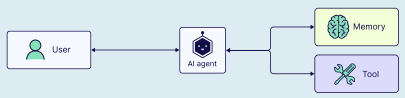

Khi tác nhân bắt đầu hoạt động không đúng, nguyên nhân có thể:
- Quá nhiều tool
- Quá nhiều context
- Quá nhiều lỗi: dẫn đến tác nhân bắt đầu tạo ra kết quả không tối ưu hoặc không chính xác do trách nhiệm quá rộng

Lúc này, một tác nhân đơn lẻ có thể quá tải và chúng ta bắt đầu chia nhỏ nhiệm vụ thành các tác nhân nhỏ hơn giúp dễ dàng quản trị và nâng cao chất lượng giải pháp.

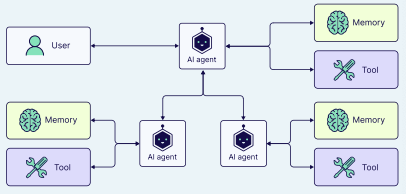

# 2. Multi-agent architectures

- single agent và multi-agent đều có điểm mạnh và điểm yếu riêng
- single agent mạnh với các tác vụ đơn lẻ
- multi-agent mạnh với các quy trình phức tạp đòi hỏi sự linh hoạt và điều hướng

## 2.1 Patterns in Multi-agent Systems
Có một số cách để kết nối các tác nhân trong hệ thống tác nhân

### 2.1.1 Parallel
Nhiều tác nhân làm việc đồng thời trên các phần khác nhau của một nhiệm vụ

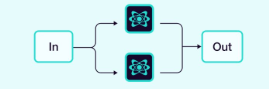

Ví dụ: dịch, tóm tắt và phân tích cảm xúc văn bản bằng cách sử dụng 3 tác nhân trong cùng một lúc

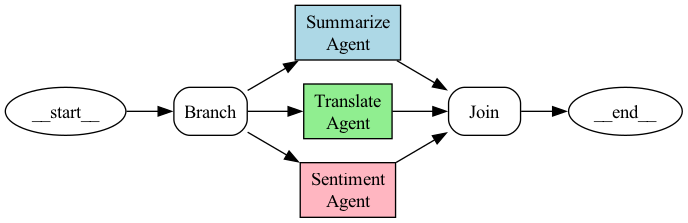

Code:

In [6]:
from typing import Dict, Any, TypedDict
from langgraph.graph import StateGraph, END
from langchain_core.runnables import RunnableConfig
from textblob import TextBlob
import re
import time

# Define the state
class AgentState(TypedDict):
    text: str
    summary: str
    translation: str
    sentiment: str
    summary_time: float
    translation_time: float
    sentiment_time: float

# Summarization Agent
def summarize_agent(state: AgentState) -> Dict[str, Any]:
    print("Summarization Agent: Running")
    start_time = time.time()
    
    try:
        text = state["text"]
        if not text.strip():
            return {
                "summary": "No text provided for summarization.",
                "summary_time": 0.0
            }
            
        time.sleep(2)
        sentences = re.split(r'(?<=[.!?]) +', text.strip())
        scored_sentences = [(s, len(s.split())) for s in sentences if s]
        top_sentences = [s for s, _ in sorted(scored_sentences, key=lambda x: x[1], reverse=True)[:2]]
        summary = " ".join(top_sentences) if top_sentences else "Text too short to summarize."
        
        processing_time = time.time() - start_time
        print(f"Summarization Agent: Completed in {processing_time:.2f} seconds")
        
        return {
            "summary": summary,
            "summary_time": processing_time
        }
    except Exception as e:
        return {
            "summary": f"Error in summarization: {str(e)}",
            "summary_time": 0.0
        }

# Translation Agent
def translate_agent(state: AgentState) -> Dict[str, Any]:
    print("Translation Agent: Running")
    start_time = time.time()
    
    try:
        text = state["text"]
        if not text.strip():
            return {
                "translation": "No text provided for translation.",
                "translation_time": 0.0
            }
            
        time.sleep(3)
        translation = (
            "El nuevo parque en la ciudad es una maravillosa adición. "
            "Las familias disfrutan de los espacios abiertos, y a los niños les encanta el parque infantil. "
            "Sin embargo, algunas personas piensan que el área de estacionamiento es demasiado pequeña."
        )
        
        processing_time = time.time() - start_time
        print(f"Translation Agent: Completed in {processing_time:.2f} seconds")
        
        return {
            "translation": translation,
            "translation_time": processing_time
        }
    except Exception as e:
        return {
            "translation": f"Error in translation: {str(e)}",
            "translation_time": 0.0
        }

# Sentiment Agent
def sentiment_agent(state: AgentState) -> Dict[str, Any]:
    print("Sentiment Agent: Running")
    start_time = time.time()
    
    try:
        text = state["text"]
        if not text.strip():
            return {
                "sentiment": "No text provided for sentiment analysis.",
                "sentiment_time": 0.0
            }
            
        time.sleep(1.5)
        blob = TextBlob(text)
        polarity = blob.sentiment.polarity
        subjectivity = blob.sentiment.subjectivity
        
        sentiment = "Positive" if polarity > 0 else "Negative" if polarity < 0 else "Neutral"
        result = f"{sentiment} (Polarity: {polarity:.2f}, Subjectivity: {subjectivity:.2f})"
        
        processing_time = time.time() - start_time
        print(f"Sentiment Agent: Completed in {processing_time:.2f} seconds")
        
        return {
            "sentiment": result,
            "sentiment_time": processing_time
        }
    except Exception as e:
        return {
            "sentiment": f"Error in sentiment analysis: {str(e)}",
            "sentiment_time": 0.0
        }

# Join Node
def join_parallel_results(state: AgentState) -> AgentState:
    return state

# Build the Graph
def build_parallel_graph() -> StateGraph:
    workflow = StateGraph(AgentState)
    
    # Define parallel branches
    parallel_branches = {
        "summarize_node": summarize_agent,
        "translate_node": translate_agent,
        "sentiment_node": sentiment_agent
    }
    
    # Add parallel processing nodes
    for name, agent in parallel_branches.items():
        workflow.add_node(name, agent)
    
    # Add branching and joining nodes
    workflow.add_node("branch", lambda state: state)  # Simplified branch function
    workflow.add_node("join", join_parallel_results)
    
    # Set entry point
    workflow.set_entry_point("branch")
    
    # Add edges for parallel execution
    for name in parallel_branches:
        workflow.add_edge("branch", name)
        workflow.add_edge(name, "join")
    
    workflow.add_edge("join", END)
    
    return workflow.compile()

# Main function
def main():
    text = (
        "The new park in the city is a wonderful addition. Families are enjoying the open spaces, "
        "and children love the playground. However, some people think the parking area is too small."
    )
    
    initial_state: AgentState = {
        "text": text,
        "summary": "",
        "translation": "",
        "sentiment": "",
        "summary_time": 0.0,
        "translation_time": 0.0,
        "sentiment_time": 0.0
    }
    
    print("\nBuilding new graph...")
    app = build_parallel_graph()
    
    print("\nStarting parallel processing...")
    start_time = time.time()
    
    config = RunnableConfig(parallel=True)
    result = app.invoke(initial_state, config=config)
    
    total_time = time.time() - start_time
    
    print("\n=== Parallel Task Results ===")
    print(f"Input Text:\n{text}\n")
    print(f"Summary:\n{result['summary']}\n")
    print(f"Translation (Spanish):\n{result['translation']}\n")
    print(f"Sentiment Analysis:\n{result['sentiment']}\n")
    
    print("\n=== Processing Times ===")
    processing_times = {
        "summary": result["summary_time"],
        "translation": result["translation_time"],
        "sentiment": result["sentiment_time"]
    }
    for agent, time_taken in processing_times.items():
        print(f"{agent.capitalize()}: {time_taken:.2f} seconds")
    
    print(f"\nTotal Wall Clock Time: {total_time:.2f} seconds")
    print(f"Sum of Individual Processing Times: {sum(processing_times.values()):.2f} seconds")
    print(f"Time Saved by Parallel Processing: {sum(processing_times.values()) - total_time:.2f} seconds")

if __name__ == "__main__":
    main()


Building new graph...

Starting parallel processing...
Sentiment Agent: Running
Summarization Agent: Running
Translation Agent: Running
Sentiment Agent: Completed in 1.50 seconds
Summarization Agent: Completed in 2.00 seconds
Translation Agent: Completed in 3.00 seconds

=== Parallel Task Results ===
Input Text:
The new park in the city is a wonderful addition. Families are enjoying the open spaces, and children love the playground. However, some people think the parking area is too small.

Summary:
Families are enjoying the open spaces, and children love the playground. The new park in the city is a wonderful addition.

Translation (Spanish):
El nuevo parque en la ciudad es una maravillosa adición. Las familias disfrutan de los espacios abiertos, y a los niños les encanta el parque infantil. Sin embargo, algunas personas piensan que el área de estacionamiento es demasiado pequeña.

Sentiment Analysis:
Positive (Polarity: 0.31, Subjectivity: 0.59)


=== Processing Times ===
Summary: 2

- Parallelism (sự song song): ba tác vụ (dịch thuật, tóm tắt và phân tích tình cảm) chạy đồng thời, giúp giảm thời gian xử lý
- Independence (độc lập): mỗi tác nhân hoạt động dựa trên văn bản đầu vào độc lập. Không yêu cầu giao tiếp giữa các tác nhân trong quá trình hoạt động.
- Coordination (phối hợp): hàng đợi đảm bảo kết quả được thu thập an toàn và hiển thị theo thứ tự
- Realistic Use Case (trường hợp sử dụng thực tế): tóm tắt, dịch văn bản và phân tích cảm tính là những nhiệm vụ NLP phổ biến được hưởng lợi từ xử lý song song, đặc biệt là với các văn bản dài hơn

### 2.1.2 Sequential
Các nhiệm vụ được xử lý tuần tự, trong đó đầu ra của tác nhân này sẽ trở thành đầu vào của tác nhân sau

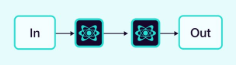

Code ví dụ: Phê duyệt nhiều bước (multi-step approvals)

In [2]:
from typing import Dict
from langgraph.graph import StateGraph, MessagesState, END
from langchain_core.runnables import RunnableConfig
from langchain_core.messages import HumanMessage, AIMessage
import json

# Agent 1: Team Lead
def team_lead_agent(state: MessagesState, config: RunnableConfig) -> Dict:
    print("Agent (Team Lead): Starting review")
    messages = state["messages"]
    proposal = json.loads(messages[0].content)
    title = proposal.get("title", "")
    amount = proposal.get("amount", 0.0)

    if not title or amount <= 0:
        status = "Rejected"
        comment = "Team Lead: Proposal rejected due to missing title or invalid amount."
        goto = END
    else:
        status = "Approved by Team Lead"
        comment = "Team Lead: Proposal is complete and approved."
        goto = "dept_manager"

    print(f"Agent (Team Lead): Review complete - {status}")
    messages.append(AIMessage(
        content=json.dumps({"status": status, "comment": comment}),
        additional_kwargs={"agent": "team_lead", "goto": goto}
    ))
    return {"messages": messages}

# Agent 2: Department Manager
def dept_manager_agent(state: MessagesState, config: RunnableConfig) -> Dict:
    print("Agent (Department Manager): Starting review")
    messages = state["messages"]
    team_lead_msg = next((m for m in messages if m.additional_kwargs.get("agent") == "team_lead"), None)
    proposal = json.loads(messages[0].content)
    amount = proposal.get("amount", 0.0)

    if json.loads(team_lead_msg.content)["status"] != "Approved by Team Lead":
        status = "Rejected"
        comment = "Department Manager: Skipped due to Team Lead rejection."
        goto = END
    elif amount > 100000:
        status = "Rejected"
        comment = "Department Manager: Budget exceeds limit."
        goto = END
    else:
        status = "Approved by Department Manager"
        comment = "Department Manager: Budget is within limits."
        goto = "finance_director"

    print(f"Agent (Department Manager): Review complete - {status}")
    messages.append(AIMessage(
        content=json.dumps({"status": status, "comment": comment}),
        additional_kwargs={"agent": "dept_manager", "goto": goto}
    ))
    return {"messages": messages}

# Agent 3: Finance Director
def finance_director_agent(state: MessagesState, config: RunnableConfig) -> Dict:
    print("Agent (Finance Director): Starting review")
    messages = state["messages"]
    dept_msg = next((m for m in messages if m.additional_kwargs.get("agent") == "dept_manager"), None)
    proposal = json.loads(messages[0].content)
    amount = proposal.get("amount", 0.0)

    if json.loads(dept_msg.content)["status"] != "Approved by Department Manager":
        status = "Rejected"
        comment = "Finance Director: Skipped due to Dept Manager rejection."
    elif amount > 50000:
        status = "Rejected"
        comment = "Finance Director: Insufficient budget."
    else:
        status = "Approved"
        comment = "Finance Director: Approved and feasible."

    print(f"Agent (Finance Director): Review complete - {status}")
    messages.append(AIMessage(
        content=json.dumps({"status": status, "comment": comment}),
        additional_kwargs={"agent": "finance_director", "goto": END}
    ))
    return {"messages": messages}

# Routing function
def route_step(state: MessagesState) -> str:
    for msg in reversed(state["messages"]):
        goto = msg.additional_kwargs.get("goto")
        if goto:
            print(f"Routing: Agent {msg.additional_kwargs.get('agent')} set goto to {goto}")
            return goto
    return END

# Build LangGraph
builder = StateGraph(MessagesState)
builder.add_node("team_lead", team_lead_agent)
builder.add_node("dept_manager", dept_manager_agent)
builder.add_node("finance_director", finance_director_agent)

builder.set_entry_point("team_lead")

builder.add_conditional_edges("team_lead", route_step, {
    "dept_manager": "dept_manager",
    END: END
})
builder.add_conditional_edges("dept_manager", route_step, {
    "finance_director": "finance_director",
    END: END
})
builder.add_conditional_edges("finance_director", route_step, {
    END: END
})

workflow = builder.compile()

# Main runner
def main():
    initial_state = {
        "messages": [
            HumanMessage(
                content=json.dumps({
                    "title": "New Equipment Purchase",
                    "amount": 40000.0,
                    "department": "Engineering"
                })
            )
        ]
    }

    result = workflow.invoke(initial_state)
    messages = result["messages"]
    proposal = json.loads(messages[0].content)
    print("\n=== Approval Results ===")
    print(f"Proposal Title: {proposal['title']}")

    final_status = "Unknown"
    comments = []
    for msg in messages[1:]:
        if isinstance(msg, AIMessage):
            try:
                data = json.loads(msg.content)
                if "status" in data:
                    final_status = data["status"]
                if "comment" in data:
                    comments.append(data["comment"])
            except Exception:
                continue

    print(f"Final Status: {final_status}")
    print("Comments:")
    for comment in comments:
        print(f"  - {comment}")

if __name__ == "__main__":
    main()

Agent (Team Lead): Starting review
Agent (Team Lead): Review complete - Approved by Team Lead
Routing: Agent team_lead set goto to dept_manager
Agent (Department Manager): Starting review
Agent (Department Manager): Review complete - Approved by Department Manager
Routing: Agent dept_manager set goto to finance_director
Agent (Finance Director): Starting review
Agent (Finance Director): Review complete - Approved
Routing: Agent finance_director set goto to __end__

=== Approval Results ===
Proposal Title: New Equipment Purchase
Final Status: Approved
Comments:
  - Team Lead: Proposal is complete and approved.
  - Department Manager: Budget is within limits.
  - Finance Director: Approved and feasible.


Sequential Execution:
- Agents run in order: Trưởng nhóm → Quản lý phòng ban → Giám đốc tài chính.
- Nếu có bất kỳ tác nhân nào từ chối, vòng lặp sẽ bị phá vỡ, bỏ qua tác nhân còn lại
- Mỗi tác nhân sẽ sửa đổi đối tượng, đề xuất được chia sẻ, cập nhật trạng thái và bình luận

Coordination:
- Kết quả được lưu trữ trong một danh sách, nhưng đối tượng đề xuất mang trạng thái giữa các tác nhân
- Không sử dụng đa xử lý, đảm bảo quy trình làm việc theo thứ tự, luồng đơn

### 2.1.3 Loop
Các tác nhân hoạt động theo chu kỳ lặp đi lặp lại,liên tục cải thiện kết quả đầu ra dựa trên phản hồi từ các tác nhân khác.

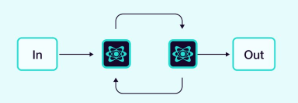

Ví dụ: Các trường hợp sử dụng đánh giá, chẳng hạn như viết mã và kiểm tra mã.

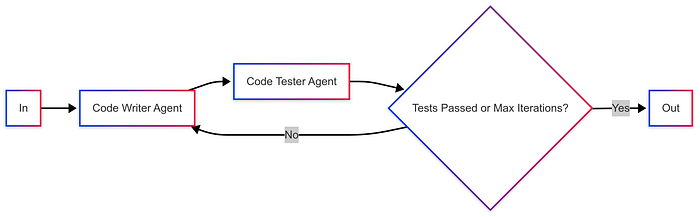

Code:


In [4]:
from typing import Dict, Any, List
from langgraph.graph import StateGraph, END
from langchain_core.runnables import RunnableConfig
import textwrap


# State to track the workflow
class EvaluationState(Dict[str, Any]):
    code: str = ""
    feedback: str = ""
    passed: bool = False
    iteration: int = 0
    max_iterations: int = 3
    history: List[Dict] = []

    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.setdefault("code", "")
        self.setdefault("feedback", "")
        self.setdefault("passed", False)
        self.setdefault("iteration", 0)
        self.setdefault("max_iterations", 3)
        self.setdefault("history", [])


# Agent 1: Code Writer
def code_writer_agent(state: EvaluationState, config: RunnableConfig) -> Dict[str, Any]:
    print(f"Iteration {state['iteration'] + 1} - Code Writer: Generating code")
    print(f"Iteration {state['iteration'] + 1} - Code Writer: Received feedback: {state['feedback']}")
    
    iteration = state["iteration"] + 1
    feedback = state["feedback"]

    if iteration == 1:
        # Initial attempt: Basic factorial with bugss (no handling for zero or negative)
        code = textwrap.dedent("""
            def factorial(n):
                result = 1
                for i in range(1, n+1):
                    result *= 1
                return result
        """)
        writer_feedback = "Initial code generated."
    elif "factorial(0)" in feedback.lower():
        # Fix for zero case
        code = textwrap.dedent("""
            def factorial(n):
                if n == 0:
                    return 1
                result = 1
                for i in range(1, n+1):
                    result *= i
                return result
        """)
        writer_feedback = "Fixed handling for n=0."
    elif "factorial(-1)" in feedback.lower() or "negative" in feedback.lower():
        # Fix for negative input 
        code = textwrap.dedent("""
            def factorial(n):
                if n < 0:
                    raise ValueError("Factorial not defined for negative numbers.")
                if n == 0:
                    return 1
                result = 1
                for i in range(1, n+1):
                    result *= i
                return result
        """)
        writer_feedback = "Added error handling for negative inputs."
    else:
        code = state["code"]
        writer_feedback = "No further improvements needed."
    
    print(f"Iteration {iteration} - Code Writer: Code generated")
    return {
        "code": code,
        "feedback": writer_feedback,
        "iteration": iteration
    }


# Agent 2: Code Tester
def code_tester_agent(state: EvaluationState, config: RunnableConfig) -> Dict[str, Any]:
    print(f"Iteration {state["iteration"]} - Code Tester: Testing code")
    code = state["code"]

    try:
        # Define test cases
        test_cases = [
            (0, 1),     # factorial(0) = 1
            (1, 1),     # factorial(1) = 1
            (5, 120),   # factorial(5) = 120
            (-1, None), # Should raise ValueError
        ]
        # Execute code in a safe namespace
        namespace = {}
        exec(code, namespace)
        factorial = namespace["factorial"]
        if not callable(factorial):
            return {"passed": False, "feedback": "No factorial function found."}
        
        feedback_parts = []
        passed = True

        # Run all test cases and collect all failures
        for input_val, expected in test_cases:
            try:
                result = factorial(input_val)
                if expected is None: # Expecting an error
                    passed = False
                    feedback_parts.append(f"Test failed: factorial({input_val}) should raise an error.")
                elif result != expected:
                    passed = False
                    feedback_parts.append(f"Test failed: factorial({input_val}) returned {result}, expected {expected}.")
            except ValueError as ve:
                if expected is not None:
                    passed = False
                    feedback_parts.append(f"Test failed: factorial({input_val}) raised ValueError unexpectedly: {str(ve)}")
            except Exception as e:
                passed = False
                feedback_parts.append(f"Test failed: factorial({input_val}) caused error: {str(e)}")

        feedback = "All test passed!" if passed else "\n".join(feedback_parts)
        print(f"Iteration {state["iteration"]} - Code Tester: Testing complete - {"Passed" if passed else "Failed"}")

        # Log the attempt in history
        history = state["history"]
        history.append({
            "iteration": state["iteration"],
            "code": code,
            "feedback": feedback,
            "passed": passed
        })

        return {
            "passed": passed,
            "feedback": feedback,
            "history": history,
        }
    except Exception as e:
        print(f"Iteration {state['iteration']} - Code Tester: Failed")
        return {"passed": False, "feedback": f"Error in testing: {str(e)}"}

# Conditional edge to decide whether to loop or end
def should_continue(state: EvaluationState) -> str:
    if state["passed"] or state["iteration"] >= state["max_iterations"]:
        print(f"Iteration {state["iteration"]} - Loop continues: Tests failed")
        return "end"
    print(f"Iteration {state["iteration"]} - Loop continues: Tests failed")
    return "code_writer"

# Build the LangGraph workflow
workflow = StateGraph(EvaluationState)

# Add nodes
workflow.add_node("code_writer", code_writer_agent)
workflow.add_node("code_tester", code_tester_agent)

# Add edges
workflow.set_entry_point("code_writer")
workflow.add_edge("code_writer", "code_tester")
workflow.add_conditional_edges(
    "code_tester",
    should_continue,
    {
        "code_writer": "code_writer",
        "end": END
    }
)

# Compile the graph
app = workflow.compile()

# Run the workflow
def main():
    initial_state = EvaluationState()
    result = app.invoke(initial_state)

    # Display results
    print("\n=== Evaluation Results ===")
    print(f"Final Status: {'Passed' if result['passed'] else 'Failed'} after {result['iteration']} iteration(s)")
    print(f"Final Code:\n{result['code']}")
    print(f"Final Feedback:\n{result['feedback']}")
    print("\nIteration History:")

    for attempt in result["history"]:
        print(f"Iteration {attempt['iteration']}:")
        print(f"  Code:\n{attempt['code']}")
        print(f"  Feedback: {attempt['feedback']}")
        print(f"  Passed: {attempt['passed']}\n")

if __name__ == "__main__":
    main()


Iteration 1 - Code Writer: Generating code
Iteration 1 - Code Writer: Received feedback: 
Iteration 1 - Code Writer: Code generated
Iteration 1 - Code Tester: Testing code
Iteration 1 - Code Tester: Testing complete - Failed
Iteration 1 - Loop continues: Tests failed
Iteration 2 - Code Writer: Generating code
Iteration 2 - Code Writer: Received feedback: Test failed: factorial(5) returned 1, expected 120.
Test failed: factorial(-1) should raise an error.
Iteration 2 - Code Writer: Code generated
Iteration 2 - Code Tester: Testing code
Iteration 2 - Code Tester: Testing complete - Passed
Iteration 2 - Loop continues: Tests failed

=== Evaluation Results ===
Final Status: Passed after 2 iteration(s)
Final Code:

def factorial(n):
    if n < 0:
        raise ValueError("Factorial not defined for negative numbers.")
    if n == 0:
        return 1
    result = 1
    for i in range(1, n+1):
        result *= i
    return result

Final Feedback:
All test passed!

Iteration History:
Iteration

Explaination:
- Comprehensive Feedback: Code tester hiện báo cáo tất cả các lỗi kiểm tra, đảm bảo code writer có thông tin cần thiết để khắc phục sự cố theo từng bước
- Correct Feedback Handling: Trình viết mã ưu tiên sửa lỗi, đảm bảo cải tiến dần dần
- Loop Termination: Vòng lặp thoát đúng cách khi các bài kiểm tra vượt qua, thay vì chạy cả 3 lần lặp một cách không cần thiết

### 2.1.4 Router
Một bộ định tuyến trung tâm (central router) quyết định agent nào được gọi dựa trên nhiệm vụ hoặc đầu vào

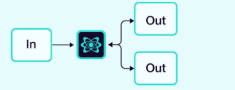

Ví dụ: Định tuyến phiếu hỗ trợ khách hàng

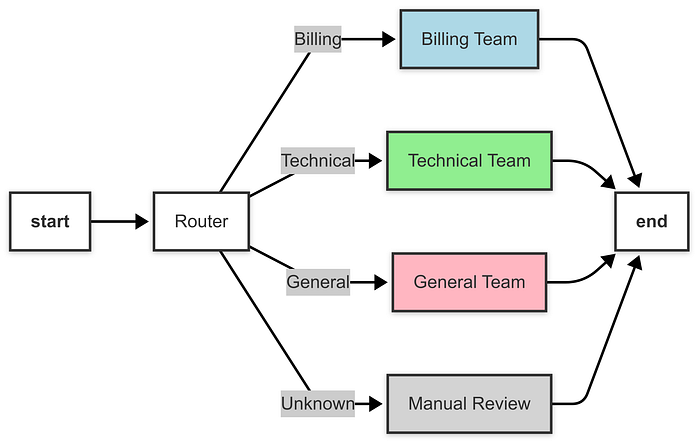

Code ví dụ:


In [ ]:
from typing import Dict, Any, TypedDict, Literal
from langgraph.graph import StateGraph, END
from langchain_core.runnables import RunnableConfig
import re
import time


# Step 1: Define the State
# The state holds the ticket information and the processing results
class TicketState(TypedDict):
    ticket_text: str        # The content of the ticket
    category: str           # The determined category (Billing, Technical, General or Unknow)
    resolution: str         # The resolution provided by the support team
    processing_time: float  # Time taken to process the ticket


# Step 2: Define the Router Agents
# This agent analyzes the ticket and determines its category
def router_agent(state: TicketState) -> Dict[str, Any]:
    print("Router Agent: Analyzing ticket...")
    start_time = time.time()

    ticket_text = state["ticket_text"].lower()

    # Simple keyword-based categorization (could be replaced with an LLM model)
    if any(keyword in ticket_text for keyword in ["billing", "payment", "invoice", "charge"]):
        category = "Billing"
    elif any(keyword in ticket_text for keyword in ["technical", "bug", "error", "crash"]):
        category = "Technical"
    elif any(keyword in ticket_text for keyword in ["general", "question", "inquiry", "infor"]):
        category = "General"
    else:
        category = "Unknown"

    processing_time = time.time() - start_time
    print(f"Router Agent: Categorized as '{category}' in {processing_time:.2f} seconds")

    return {
        "category": category,
        "processing_time": processing_time
    }

# Step 3: Define the Support Team Agents
# Each agent handles tickets for a specific category
    
# Billing Team Agent
def billing_team_agent(state: TicketState) -> Dict[str, Any]:
    print("Billing Team Agent: Processing ticket...")
    start_time = time.time()
    
    ticket_text = state["ticket_text"]
    resolution = f"Billing Team: Reviewed ticket '{ticket_text}'. Please check your invoice details or contact our billing department for further assistance."
    
    processing_time = time.time() - start_time
    time.sleep(1)  # Simulate processing time
    print(f"Billing Team Agent: Completed in {processing_time:.2f} seconds")
    
    return {
        "resolution": resolution,
        "processing_time": state["processing_time"] + processing_time
    }

# Technical Support Team Agent
def technical_team_agent(state: TicketState) -> Dict[str, Any]:
    print("Technical Team Agent: Processing ticket...")
    start_time = time.time()
    
    ticket_text = state["ticket_text"]
    resolution = f"Technical Team: Reviewed ticket '{ticket_text}'. Please try restarting your device or submit a detailed error log for further investigation."
    
    processing_time = time.time() - start_time
    time.sleep(1.5)  # Simulate processing time
    print(f"Technical Team Agent: Completed in {processing_time:.2f} seconds")
    
    return {
        "resolution": resolution,
        "processing_time": state["processing_time"] + processing_time
    }

# General Support Team Agent
def general_team_agent(state: TicketState) -> Dict[str, Any]:
    print("General Team Agent: Processing ticket...")
    start_time = time.time()
    
    ticket_text = state["ticket_text"]
    resolution = f"General Team: Reviewed ticket '{ticket_text}'. For more information, please refer to our FAQ or contact us via email."
    
    processing_time = time.time() - start_time
    time.sleep(0.8)  # Simulate processing time
    print(f"General Team Agent: Completed in {processing_time:.2f} seconds")
    
    return {
        "resolution": resolution,
        "processing_time": state["processing_time"] + processing_time
    }

# Manual Review Agent (for unknown categories)
def manual_review_agent(state: TicketState) -> Dict[str, Any]:
    print("Manual Review Agent: Processing ticket...")
    start_time = time.time()
    
    ticket_text = state["ticket_text"]
    resolution = f"Manual Review: Ticket '{ticket_text}' could not be categorized. Flagged for human review. Please assign to the appropriate team manually."
    
    processing_time = time.time() - start_time
    time.sleep(0.5)  # Simulate processing time
    print(f"Manual Review Agent: Completed in {processing_time:.2f} seconds")
    
    return {
        "resolution": resolution,
        "processing_time": state["processing_time"] + processing_time
    }

# Step 4: Define the Router Function
# This function determines the next node based on the ticket category
def route_ticket(state: TicketState) -> Literal["billing_team", "technical_team", "general_team", "manual_review"]:
    category = state["category"]
    print(f"Routing: Ticket category is '{category}'")
    
    if category == "Billing":
        return "billing_team"
    elif category == "Technical":
        return "technical_team"
    elif category == "General":
        return "general_team"
    else:
        return "manual_review"

# Step 5: Build the Graph with a Router Pattern
def build_router_graph() -> StateGraph:
    workflow = StateGraph(TicketState)
    
    # Add nodes
    workflow.add_node("router", router_agent)  # Entry point: Categorizes the ticket
    workflow.add_node("billing_team", billing_team_agent)  # Handles billing tickets
    workflow.add_node("technical_team", technical_team_agent)  # Handles technical tickets
    workflow.add_node("general_team", general_team_agent)  # Handles general inquiries
    workflow.add_node("manual_review", manual_review_agent)  # Handles uncategorized tickets
    
    # Set the entry point
    workflow.set_entry_point("router")
    
    # Add conditional edges for routing
    workflow.add_conditional_edges(
        "router",
        route_ticket,  # Router function to determine the next node
        {
            "billing_team": "billing_team",
            "technical_team": "technical_team",
            "general_team": "general_team",
            "manual_review": "manual_review"
        }
    )
    
    # Add edges from each team to END
    workflow.add_edge("billing_team", END)
    workflow.add_edge("technical_team", END)
    workflow.add_edge("general_team", END)
    workflow.add_edge("manual_review", END)
    
    return workflow.compile()

# Step 6: Run the Workflow
def main():
    # Test cases for different ticket categories
    test_tickets = [
        "I have a billing issue with my last invoice. It seems I was overcharged.",
        "My app keeps crashing with a technical error. Please help!",
        "I have a general question about your services. Can you provide more info?",
        "I need assistance with something unrelated to billing or technical issues."
    ]
    
    for ticket_text in test_tickets:
        # Initialize the state for each ticket
        initial_state: TicketState = {
            "ticket_text": ticket_text,
            "category": "",
            "resolution": "",
            "processing_time": 0.0
        }
        
        print(f"\n=== Processing Ticket: '{ticket_text}' ===")
        app = build_router_graph()
        
        start_time = time.time()
        result = app.invoke(initial_state, config=RunnableConfig())
        total_time = time.time() - start_time
        
        print("\n=== Ticket Results ===")
        print(f"Category: {result['category']}")
        print(f"Resolution: {result['resolution']}")
        print(f"Total Processing Time: {result['processing_time']:.2f} seconds")
        print(f"Total Wall Clock Time: {total_time:.2f} seconds")
        print("-" * 50)

if __name__ == "__main__":
    main()


=== Processing Ticket: 'I have a billing issue with my last invoice. It seems I was overcharged.' ===
Router Agent: Analyzing ticket...
Router Agent: Categorized as 'Billing' in 0.00 seconds
Routing: Ticket category is 'Billing'
Billing Team Agent: Processing ticket...
Billing Team Agent: Completed in 0.00 seconds

=== Ticket Results ===
Category: Billing
Resolution: Billing Team: Reviewed ticket 'I have a billing issue with my last invoice. It seems I was overcharged.'. Please check your invoice details or contact our billing department for further assistance.
Total Processing Time: 0.00 seconds
Total Wall Clock Time: 1.04 seconds
--------------------------------------------------

=== Processing Ticket: 'My app keeps crashing with a technical error. Please help!' ===
Router Agent: Analyzing ticket...
Router Agent: Categorized as 'Technical' in 0.00 seconds
Routing: Ticket category is 'Technical'
Technical Team Agent: Processing ticket...
Technical Team Agent: Completed in 0.00 secon

- Dynamic Routing: router_agent xác định danh mục vé và hàm route_ticket hướng luồng công việc đến nút (node) thích hợp bằng cách sử dụng conditional_edges
- Condition-Based Flow (luồng dựa trên điều kiện): không giống mô hình song song (trong đó nhiều nút chạy đồng thời), mô hình bộ định tuyến (router) chỉ thực hiện một đường dẫn dựa trên điều kiện (thể loại)
- Scalability: Có thể thêm nhiều nhóm hỗ trợ bằng cách mở rộng các nút và cập nhật hàm route_ticket để xử lý danh mục mới

### 2.1.5 Aggregator (or Synthesizer)
Kết quả đầu ra của các tác nhân đóng góp sẽ được thu thập và tổng hợp bằng một bộ tổng hợp để có được kết quả cuối cùng

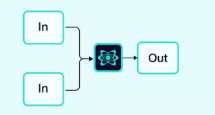

Ví dụ: Công cụ tổng hợp phân tích tình cảm trên mạng xã hội

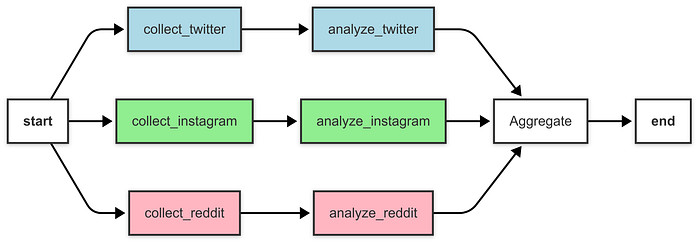

Code ví dụ:

In [6]:
from typing import Dict, Any, TypedDict, List
from langgraph.graph import StateGraph, END
from langchain_core.runnables import RunnableConfig
from textblob import TextBlob
import time
from typing_extensions import Annotated
from operator import add

# Step 1: Define the State
class SocialMediaState(TypedDict):
    twitter_posts: List[str]
    instagram_posts: List[str]
    reddit_posts: List[str]
    twitter_sentiment: Dict[str, float]
    instagram_sentiment: Dict[str, float]
    reddit_sentiment: Dict[str, float]
    final_report: str
    processing_time: Annotated[float, add]

# Step 2: Define the Post Collection Agents
def collect_twitter_posts(state: SocialMediaState) -> Dict[str, Any]:
    print("Twitter Agent: Collecting posts...")
    start_time = time.time()
    
    posts = [
        "Loving the new product from this brand! Amazing quality.",
        "Terrible customer service from this brand. Very disappointed."
    ]
    
    time.sleep(1)  # Simulate processing time
    processing_time = time.time() - start_time  # Include time.sleep in processing_time
    print(f"Twitter Agent: Completed in {processing_time:.2f} seconds")
    
    return {
        "twitter_posts": posts,
        "processing_time": processing_time
    }

def collect_instagram_posts(state: SocialMediaState) -> Dict[str, Any]:
    print("Instagram Agent: Collecting posts...")
    start_time = time.time()
    
    posts = [
        "Beautiful design by this brand! #loveit",
        "Not impressed with the latest release. Expected better."
    ]
    
    time.sleep(1.2)  # Simulate processing time
    processing_time = time.time() - start_time
    print(f"Instagram Agent: Completed in {processing_time:.2f} seconds")
    
    return {
        "instagram_posts": posts,
        "processing_time": processing_time
    }

def collect_reddit_posts(state: SocialMediaState) -> Dict[str, Any]:
    print("Reddit Agent: Collecting posts...")
    start_time = time.time()
    
    posts = [
        "This brand is awesome! Great value for money.",
        "Had a bad experience with their support team. Not happy."
    ]
    
    time.sleep(0.8)  # Simulate processing time
    processing_time = time.time() - start_time
    print(f"Reddit Agent: Completed in {processing_time:.2f} seconds")
    
    return {
        "reddit_posts": posts,
        "processing_time": processing_time
    }

# Step 3: Define the Sentiment Analysis Agents
def analyze_twitter_sentiment(state: SocialMediaState) -> Dict[str, Any]:
    print("Twitter Sentiment Agent: Analyzing sentiment...")
    start_time = time.time()
    
    posts = state["twitter_posts"]
    polarities = [TextBlob(post).sentiment.polarity for post in posts]
    avg_polarity = sum(polarities) / len(polarities) if polarities else 0.0
    
    time.sleep(0.5)  # Simulate processing time
    processing_time = time.time() - start_time
    print(f"Twitter Sentiment Agent: Completed in {processing_time:.2f} seconds")
    
    return {
        "twitter_sentiment": {"average_polarity": avg_polarity, "num_posts": len(posts)},
        "processing_time": processing_time
    }

def analyze_instagram_sentiment(state: SocialMediaState) -> Dict[str, Any]:
    print("Instagram Sentiment Agent: Analyzing sentiment...")
    start_time = time.time()
    
    posts = state["instagram_posts"]
    polarities = [TextBlob(post).sentiment.polarity for post in posts]
    avg_polarity = sum(polarities) / len(polarities) if polarities else 0.0
    
    time.sleep(0.6)  # Simulate processing time
    processing_time = time.time() - start_time
    print(f"Instagram Sentiment Agent: Completed in {processing_time:.2f} seconds")
    
    return {
        "instagram_sentiment": {"average_polarity": avg_polarity, "num_posts": len(posts)},
        "processing_time": processing_time
    }

def analyze_reddit_sentiment(state: SocialMediaState) -> Dict[str, Any]:
    print("Reddit Sentiment Agent: Analyzing sentiment...")
    start_time = time.time()
    
    posts = state["reddit_posts"]
    polarities = [TextBlob(post).sentiment.polarity for post in posts]
    avg_polarity = sum(polarities) / len(polarities) if polarities else 0.0
    
    time.sleep(0.4)  # Simulate processing time
    processing_time = time.time() - start_time
    print(f"Reddit Sentiment Agent: Completed in {processing_time:.2f} seconds")
    
    return {
        "reddit_sentiment": {"average_polarity": avg_polarity, "num_posts": len(posts)},
        "processing_time": processing_time
    }

# Step 4: Define the Aggregator Agent
def aggregate_results(state: SocialMediaState) -> Dict[str, Any]:
    print("Aggregator Agent: Generating final report...")
    start_time = time.time()
    
    twitter_sentiment = state["twitter_sentiment"]
    instagram_sentiment = state["instagram_sentiment"]
    reddit_sentiment = state["reddit_sentiment"]
    
    total_posts = (twitter_sentiment["num_posts"] +
                   instagram_sentiment["num_posts"] +
                   reddit_sentiment["num_posts"])
    weighted_polarity = (
        twitter_sentiment["average_polarity"] * twitter_sentiment["num_posts"] +
        instagram_sentiment["average_polarity"] * instagram_sentiment["num_posts"] +
        reddit_sentiment["average_polarity"] * reddit_sentiment["num_posts"]
    ) / total_posts if total_posts > 0 else 0.0
    
    overall_sentiment = ("Positive" if weighted_polarity > 0 else
                         "Negative" if weighted_polarity < 0 else "Neutral")
    
    report = (
        f"Overall Sentiment: {overall_sentiment} (Average Polarity: {weighted_polarity:.2f})\n"
        f"Twitter Sentiment: {twitter_sentiment['average_polarity']:.2f} (Posts: {twitter_sentiment['num_posts']})\n"
        f"Instagram Sentiment: {instagram_sentiment['average_polarity']:.2f} (Posts: {instagram_sentiment['num_posts']})\n"
        f"Reddit Sentiment: {reddit_sentiment['average_polarity']:.2f} (Posts: {reddit_sentiment['num_posts']})"
    )
    
    time.sleep(0.3)  # Simulate processing time
    processing_time = time.time() - start_time
    print(f"Aggregator Agent: Completed in {processing_time:.2f} seconds")
    
    return {
        "final_report": report,
        "processing_time": processing_time
    }

# Step 5: Build the Graph with an Aggregator Pattern
def build_aggregator_graph() -> StateGraph:
    workflow = StateGraph(SocialMediaState)
    
    # Add nodes for collecting posts
    workflow.add_node("collect_twitter", collect_twitter_posts)
    workflow.add_node("collect_instagram", collect_instagram_posts)
    workflow.add_node("collect_reddit", collect_reddit_posts)
    
    # Add nodes for sentiment analysis
    workflow.add_node("analyze_twitter", analyze_twitter_sentiment)
    workflow.add_node("analyze_instagram", analyze_instagram_sentiment)
    workflow.add_node("analyze_reddit", analyze_reddit_sentiment)
    
    # Add node for aggregation
    workflow.add_node("aggregate", aggregate_results)
    
    # Add a branching node to trigger all collection nodes in parallel
    workflow.add_node("branch", lambda state: state)
    
    # Set the entry point to the branch node
    workflow.set_entry_point("branch")
    
    # Add edges from branch to collection nodes (parallel execution)
    workflow.add_edge("branch", "collect_twitter")
    workflow.add_edge("branch", "collect_instagram")
    workflow.add_edge("branch", "collect_reddit")
    
    # Add edges from collection to sentiment analysis
    workflow.add_edge("collect_twitter", "analyze_twitter")
    workflow.add_edge("collect_instagram", "analyze_instagram")
    workflow.add_edge("collect_reddit", "analyze_reddit")
    
    # Add edges from sentiment analysis to aggregator
    workflow.add_edge("analyze_twitter", "aggregate")
    workflow.add_edge("analyze_instagram", "aggregate")
    workflow.add_edge("analyze_reddit", "aggregate")
    
    # Add edge from aggregator to END
    workflow.add_edge("aggregate", END)
    
    return workflow.compile()

# Step 6: Run the Workflow
def main():
    initial_state: SocialMediaState = {
        "twitter_posts": [],
        "instagram_posts": [],
        "reddit_posts": [],
        "twitter_sentiment": {"average_polarity": 0.0, "num_posts": 0},
        "instagram_sentiment": {"average_polarity": 0.0, "num_posts": 0},
        "reddit_sentiment": {"average_polarity": 0.0, "num_posts": 0},
        "final_report": "",
        "processing_time": 0.0
    }
    
    print("\nStarting social media sentiment analysis...")
    app = build_aggregator_graph()
    
    start_time = time.time()
    config = RunnableConfig(parallel=True)
    result = app.invoke(initial_state, config=config)
    total_time = time.time() - start_time
    
    print("\n=== Sentiment Analysis Results ===")
    print(result["final_report"])
    print(f"\nTotal Processing Time: {result['processing_time']:.2f} seconds")
    print(f"Total Wall Clock Time: {total_time:.2f} seconds")

if __name__ == "__main__":
    main()


Starting social media sentiment analysis...
Instagram Agent: Collecting posts...
Reddit Agent: Collecting posts...
Twitter Agent: Collecting posts...
Reddit Agent: Completed in 0.80 seconds
Twitter Agent: Completed in 1.00 seconds
Instagram Agent: Completed in 1.20 seconds
Instagram Sentiment Agent: Analyzing sentiment...
Reddit Sentiment Agent: Analyzing sentiment...
Twitter Sentiment Agent: Analyzing sentiment...
Reddit Sentiment Agent: Completed in 0.60 seconds
Twitter Sentiment Agent: Completed in 0.73 seconds
Instagram Sentiment Agent: Completed in 0.87 seconds
Aggregator Agent: Generating final report...
Aggregator Agent: Completed in 0.30 seconds

=== Sentiment Analysis Results ===
Overall Sentiment: Positive (Average Polarity: 0.15)
Twitter Sentiment: -0.27 (Posts: 2)
Instagram Sentiment: 0.55 (Posts: 2)
Reddit Sentiment: 0.18 (Posts: 2)

Total Processing Time: 5.50 seconds
Total Wall Clock Time: 2.73 seconds


- Parallel Execution: Các nút phân tích và thu nhập chạy song song giúp giảm thời gian xử lý
- Aggregation: Nút tổng hợp kết hợp tất cả các kết quả segmentation thành kết quả cuối cùng 

### 2.1.6 Network (or Horizontal)
Các tác nhân trực tiếp gia tiếp với nhau theo hình thức nhiều - nhiều, tạo thành một mạng lưới phi tập trung

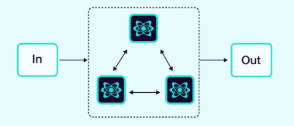

Kiến trúc này phù hợp với những vấn đề không có hệ thống phân cấp rõ ràng hoặc trình tự cụ thể để gọi các tác nhân 

Code ví dụ:


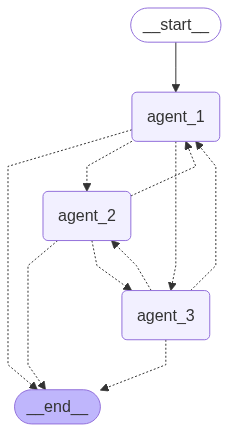

In [ ]:
from typing import Literal
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, MessagesState
from langgraph.graph import START, END
from langgraph.types import Command
from IPython.display import Image, display


model = ChatOpenAI(api_key="OPENAI_API_KEY", model="gpt-4o-mini", temperature=0.0)


def agent_1(state: MessagesState) -> Command[Literal["agent_2", "agent_3", END]]:
    # you can pass relevant parts of the state to the LLM (e.g., state["messages"])
    # to determine which agent to call next. a common pattern is to call the model
    # with a structured output (e.g. force it to return an output with a "next_agent" field)
    response = model.invoke(...)
    # route to one of the agents or exit based on the LLM's decision
    # if the LLM returns "__end__", the graph will finish execution
    return Command(
        goto=response["next_agent"],
        update={"messages": [response["content"]]},
    )
def agent_2(state: MessagesState) -> Command[Literal["agent_1", "agent_3", END]]:
    response = model.invoke(...)
    return Command(
        goto=response["next_agent"],
        update={"messages": [response["content"]]},
    )
def agent_3(state: MessagesState) -> Command[Literal["agent_1", "agent_2", END]]:
    response = model.invoke(...)
    return Command(
        goto=response["next_agent"],
        update={"messages": [response["content"]]},
    )
builder = StateGraph(MessagesState)
builder.add_node(agent_1)
builder.add_node(agent_2)
builder.add_node(agent_3)
builder.add_edge(START, "agent_1")
network = builder.compile()

display(Image(network.get_graph().draw_mermaid_png()))


- Ưu: Cộng tác phân tán và ra quyết định theo nhóm, hệ thống vẫn hoạt động ngay cả khi một số tác nhân gặp sự cố
- Nhược: Việc quản lý giao tiếp giữa các tác nhân có thể trở nên khó khăn. Giao tiếp nhiều có thể gây ra tình trạng kém hiệu quả và khả năng các thành phần phải làm việc chồng chéo

### 2.1.7 Handoffs
Trong kiến trúc multi-gents, mỗi agent đại diện cho một node đồ thị. Mỗi node thực thi nhiệm vụ của nó và quyết định cái gì cần hoàn thành tiếp theo hoặc điều hướng sang một agent khác. Một kiến trúc multi-agents phổ biến và quan trọng đó là chuyển giao, nơi mà một agent chuyển quyền điều khiển cho một agent khác. Việc chuyển giao (handoff) cho phép chỉ định
- điểm đến: tác nhân điều hướng đến một node khác/go-to
- tải trọng: chuyển các thông tin đến các tác nhân đó

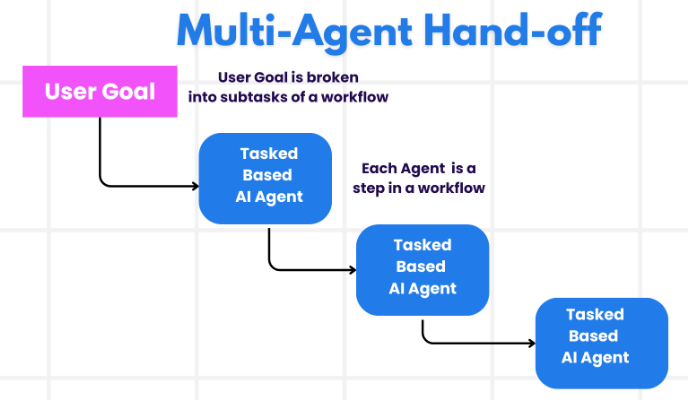

Để triển khai chuyển giao trong langgraph, các node tác nhân có thể đối tượng command cho phép bạn kết hợp cả luồng điều khiển và trạng thái

Code ví dụ:

In [ ]:
def get_next_agent():
    pass

def agent(state) -> Command[Literal["agent", "another_agent"]]:
    # the condition for routing/halting can be anything, e.g. LLM tool call / structured output, etc.
    goto = get_next_agent(...)  # 'agent' / 'another_agent'
    return Command(
        # Specify which agent to call next
        goto=goto,
        # Update the graph state
        update={"my_state_key": "my_state_value"}
    )

Trong kịch bản phức tạp hơn, trong đó mỗi node tác nhân lại là một đồ thị (đồ thị con), một nút tác nhân trong một trong các đồ thị tác nhân con muốn điều hướng đến một tác nhân khác. 

Ví dụ, nếu bạn có hai tác nhân, alice và bob (các nút đồ thị con trong đồ thị cha) và alice cần điều hướng đến bob, bạn có thể đặt graph=Command.PARENT trong đối tượng Command:

In [ ]:
def some_node_inside_alice(state):
    return Command(
        goto="bob",
        update={"my_state_key": "my_state_value"},
        # specify which graph to navigate to (defaults to the current graph)
        graph=Command.PARENT,
    )

Note:
Nếu cần hỗ trợ trực quan hóa cho các biểu đồ con giao tiếp bằng Command (graph=Command.PARENT), cần phải đóng gói chúng trong một hàm nút có chú thích Command. Ví dụ, thay vì thế này:
```python
builder.add_node(alice)
```

thì chúng ta nên làm như thế này:
```python
def call_alice(state) -> Command[Literal["bob"]]:
    return alice.invoke(state)

builder.add_node("alice", call_alice)
```

**Handoffs as tools**
Một trong những loại tác nhân phổ biến nhất là các tác nhân gọi công cụ theo kiểu ReAct. Đối với những loại tác nhân này, một mô hình chung là gói lệnh chuyển giao trong một lệnh gọi công cụ. ví dụ:

```python
def transfer_to_bob(state):
    """Transfer to bob."""
    return Command(
        goto="bob",
        update={"my_state_key": "my_state_value"},
        graph=Command.PARENT,
    )
```
Bây giờ chúng ta hãy xem xét kỹ hơn các kiến trúc đa tác nhân khác nhau.

### 2.1.8 Supervisor
Trong kiến trúc này, chúng ta định nghĩa các tác nhân là các nút và thêm một nút giám sát (LLM) để quyết định các nút tác nhân nào sẽ được goi tiếp theo. Chúng ta sử dụng Command để định tuyến thực thi đến các nút tác nhân phù hợp dựa trên quyết định của giám sát viên. Kiến trúc này cũng phù hợp để chạy nhiều tác nhân song song hoặc sử dụng mô hình map-reduce

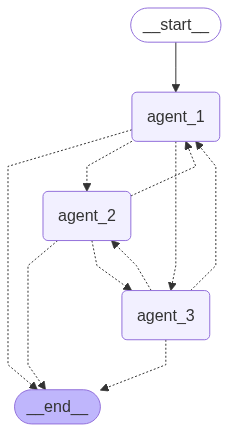

In [13]:
from typing import Literal
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, MessagesState, START, END


model = ChatOpenAI(api_key="OPENAI_API_KEY", model="gpt-4o-mini", temperature=0.0)


def supervisor(state: MessagesState) -> Command[Literal["agent_1", "agent_2", END]]:
    # you can pass relevant parts of the state to the LLM (e.g., state["messages"])
    # to determine which agent to call next. a common pattern is to call the model
    # with a structured output (e.g. force it to return an output with a "next_agent" field)
    response = model.invoke(...)
    # route to one of the agents or exit based on the LLM's decision
    # if the LLM returns "__end__", the graph will finish execution
    return Command(goto=response["next_agent"])

def agent_1(state: MessagesState) -> Command[Literal["supervisor"]]:
    # you can pass relevant parts of the state to the LLM (e.g., state["messages"])
    # and add any additional logic (different models, custom prompts, structured output, etc.)
    response = model.invoke(...)
    return Command(
        goto="supervisor",
        update={"messages": [response]}
    )

def agent_2(state: MessagesState) -> Command[Literal["supervisor"]]:
    response = model.invoke(...)
    return  Command(
        goto="supervisor",
        update={"messages": [response]}
    )


builder = StateGraph(MessagesState)
builder.add_node(supervisor)
builder.add_node(agent_1)
builder.add_node(agent_2)

builder.add_edge(START, "supervisor")

supervisor = builder.compile()

display(Image(network.get_graph().draw_mermaid_png()))

Xem thêm về ví dụ kiến trúc đa tác nhân giám sát: https://langchain-ai.github.io/langgraph/tutorials/multi_agent/agent_supervisor/

### 2.1.9 Supervisor (tool-calling)
Trong biến thể kiến trúc giám sát này, chúng ta định nghĩa từng tác nhân là công cụ và sử dụng LLM gọi công cụ nút giám sát (supervisor node). Điều này có thể được triển khai tác nhân kiểu ReAct với hai nút, một nút giám sát (LLM) và một nút thực thi công cụ (trong trường hợp này gọi là tác nhân)

In [ ]:
from typing import Annotated
from langchain_openai import ChatOpenAI
from langgraph.graph import InjectedState, create_react_agent


model = ChatOpenAI(api_key="OPENAI_API_KEY", model="gpt-4o-mini", temperature=0.0)


# this is the agent function that will be called as tool
# notice that you can pass the state to the tool via InjectedState annotation
def agent_1(state: Annotated[dict, InjectedState]):
    # you can pass relevant parts of the state to the LLM (e.g., state["messages"])
    # and add any additional logic (different models, custom prompts, structured output, etc.)
    response = model.invoke(...)
    # return the LLM response as a string (expected tool response format)
    # this will be automatically turned to ToolMessage
    # by the prebuilt create_react_agent (supervisor)
    return response.content

def agent_2(state: Annotated[dict, InjectedState]):
    response = model.invoke(...)
    return response.content

tools = [agent_1, agent_2]
# the simplest way to build a supervisor w/ tool-calling is to use prebuilt ReAct agent graph
# that consists of a tool-calling LLM node (i.e. supervisor) and a tool-executing node
supervisor = create_react_agent(model, tools)

### 2.1.10 Hierarchical (Or Vertical)
Các tác nhân được tổ chức theo cấu trúc dạng cây, với các tác nhân cấp cao (giám sát) quản lý các tác nhân cấp thấp

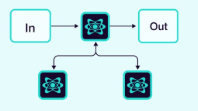

Khi thêm nhiều tác nhân vào hệ thống, supervisor có thể trở nên quá tải và gặp khó khăn trong việc quản lý tất cả, từ đó có thể đưa ra những quyết định sai lầm về việc nên gọi tác nhân nào tiếp theo (như đã đề cập đến phần kiến trúc đa tác nhân trước đó)

=> để giải quyết vấn đề này, bạn có thể thiết kế hệ thống theo mô hình phân cấp (quản lý cấp cao, quản lý cấp thấp, cấp thấp...)

code ví dụ:

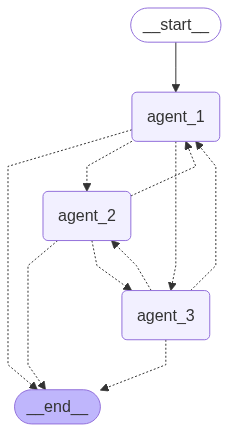

----------


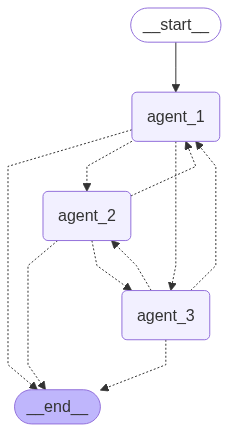

----------


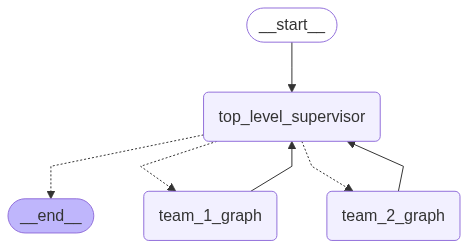

In [14]:
from typing import Literal
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, MessagesState, START, END
from langgraph.types import Command


model = ChatOpenAI(api_key="OPENAI_API_KEY", model="gpt-4o-mini", temperature=0.0)


# Define team 1 (same as the single supervisor example above)
def team_1_supervisor(state: MessagesState) -> Command[Literal["team_1_agent_1", "team_1_agent_2", END]]:
    response = model.invoke(...)
    return Command(goto=response["next_agent"])

def team_1_agent_1(state: MessagesState) -> Command[Literal["team_1_supervisor"]]:
    response = model.invoke(...)
    return Command(goto="team_1_supervisor", update={"messages": [response]})

def team_1_agent_2(state: MessagesState) -> Command[Literal["team_1_supervisor"]]:
    response = model.invoke(...)
    return Command(goto="team_1_supervisor", update={"messages": [response]})

team_1_builder = StateGraph(MessagesState)
team_1_builder.add_node(team_1_supervisor)
team_1_builder.add_node(team_1_agent_1)
team_1_builder.add_node(team_1_agent_2)

team_1_builder.add_edge(START, "team_1_supervisor")
team_1_graph = team_1_builder.compile()
display(Image(network.get_graph().draw_mermaid_png()))

print("----------")

# Define team 2 (same as the single supervisor example above)
class Team2State(MessagesState):
    next: Literal["team_2_agent_1", "team_2_agent_2", "__END__"]

def team_2_supervisor(state: Team2State):
    ...

def team_2_agent_1(state: Team2State):
    ...

def team_2_agent_2(state: Team2State):
    ...

team_2_builder = StateGraph(Team2State)
team_2_builder.add_node(team_2_supervisor)
team_2_builder.add_node(team_2_agent_1)
team_2_builder.add_node(team_2_agent_2)
team_2_builder.add_edge(START, "team_2_supervisor")
team_2_graph = team_2_builder.compile()
display(Image(network.get_graph().draw_mermaid_png()))

print("----------")

# Define top-level supervisor
builder = StateGraph(MessagesState)

def top_level_supervisor(state: MessagesState) -> Command[Literal["team_1_graph", "team_2_graph", END]]:
    # you can pass relevant parts of the state to the LLM (e.g., state["messages"])
    # to determine which team to call next. a common pattern is to call the model
    # with a structured output (e.g. force it to return an output with a "next_team" field)
    response = model.invoke(...)
    # route to one of the teams or exit based on the supervisor's decision
    # if the supervisor returns "__end__", the graph will finish execution
    return Command(goto=response["text_team"])

builder = StateGraph(MessagesState)
builder.add_node(top_level_supervisor)
builder.add_node("team_1_graph", team_1_graph)
builder.add_node("team_2_graph", team_2_graph)

builder.add_edge(START, "top_level_supervisor")
builder.add_edge("team_1_graph", "top_level_supervisor")
builder.add_edge("team_2_graph", "top_level_supervisor")

graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

- Ưu điểm: Phân chia rõ ràng vai trò và trách nhiệm giữa các tác nhân ở các cấp độ khác nhau. Giao tiếp được sắp xếp hợp lý. Phù hợp với các hệ thống lớn có luồng quyết định cấu trúc.
- Nhược điểm: Lỗi ở cấp cao hơn có thể làm gián đoạn toàn bộ hệ thống, các tác nhân cấp thấp có tính độc lập hạn chế

### 2.1.11 Custom multi-agent workflow
Mỗi tác nhân chỉ giao tiếp với một tập hợp con tác nhân. các phần của luồng giao tiếp mang tính xác định và chỉ một số tác nhân mới có thể quyết định tác nhân nào sẽ được gọi tiếp theo.

Trong kiến trúc này, chúng ta thêm các tác nhân riêng lẻ dưới dạng các nút đồ thị và xác định thứ tự các tác nhân được gọi trước trong một quy trình làm việc tùy chỉnh. Trong LangGraph, quy trình làm việc có thể được xác định theo hai cách:
- Explicit control flow (luồng điều khiển rõ ràng): LangGraph cho phép định nghĩa rõ ràng luồng điều khiển của ứng dụng (tức là trình tự giao tiếp của các tác nhân) thông qua các cạnh chuẩn của đồ thị. Đây là biến thể xác định nhất của kiến trúc trên, chúng ta luôn biết trước tác nhân nào sẽ được gọi tiếp theo
- Dynamic control flow (Luồng điều khiển động): trong LangGraph, bạn có thể cho phép các LLM quyết định các phần của luồng điều khiển ứng dụng. Điều này có thể đạt được bằng cách sử dụng Command. Một trường hợp đặc biệt của kiến trúc LLM này là kiến trúc gọi công cụ giám sát. Trong trường hợp đó, LLM gọi công cụ cung cấp quyền lực cho tác nhân giám sát sẽ quyết định thứ tự gọi các công cụ (tác nhân)

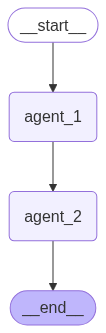

In [16]:
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, MessagesState, START, END

model = ChatOpenAI(api_key="OPENAI_API_KEY", model="gpt-4o-mini", temperature=0.0)

def agent_1(state: MessagesState):
    response = model.invoke(...)
    return {"messages": [response]}

def agent_2(state: MessagesState):
    response = model.invoke(...)
    return {"messages": [response]}

builder = StateGraph(MessagesState)
builder.add_node(agent_1)
builder.add_node(agent_2)
# Define the flow explicitly
builder.add_edge(START, "agent_1")
builder.add_edge("agent_1", "agent_2")
graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

# 3. Communication between agents

Điều quan trọng nhất khi xây dựng hệ thống đa tác tử là tìm ra cách các tác tử giao tiếp với nhau. Có một vài điều cần cân nhắc:
- Các tác tử giao tiếp với nhau qua trạng thái đồ thị hay thông qua lệnh gọi công cụ?
- Điều gì xảy ra nếu hai tác tử có lược đồ trạng thái khác nhau?
- Làm thế nào để làm việc qua danh sách tin nhắn được chia sẻ?

## 3.1 Graph state vs tool calls
"Payload" được truyền giữa các tác nhân là gì?

Trong hầu hết các kiến trúc được thảo luận ở trên, các tác nhân giao tiếp thông qua trạng thái đồ thị. Trong trường gợp giám sát viên có lệnh gọi công cụ, các payload là các đối số lệnh gọi công cụ.

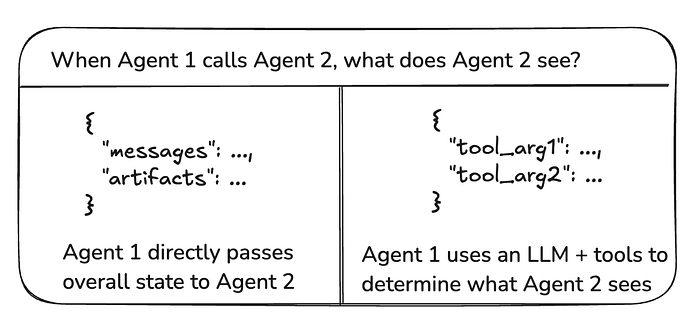

**Graph state**
Để giao tiếp thông qua trạng thái đồ thị, các nút này có thể được thêm vào dưới dạng hàm hoặc toàn bộ đồ thị con. Tại mỗi bước thực thi đồ thị, các nút tác nhân nhận trạng thái hiện tại của đồ thị, thưc thi mã tác nhân rồi sau đó truyền kết quả đến các nút tiếp theo. Thông thường các nút tác nhân chia sẻ cùng nhau một trạng thái lược đồ duy nhất. Tuy nhiên chúng ta cũng có thể thiết kế các tác nhân với các trạng thái lược đồ khác nhau.

## 3.2 Different state schemas
Một tác nhân có thể cần một trạng thái lược đồ khác so với các tác nhân còn lại. 

Ví dụ: tác nhân tìm kiếm có thể chỉ cần theo dõi các truy vấn và các tài liệu đã truy xuất. Có hai cách để đạt được điều này trong langgraph:
- Xác định các tác nhân đồ thị con với một lược đồ trạng thái riêng biệt. Nếu không có khóa trạng thái chung giữa đồ thị con và đồ thị cha, điều quan trọng là phải thêm các phép biến đổi đầu vào/ra để đồ thị cha biết cách giao tiếp với đồ thị con.
- Định nghĩa các hàm nút tác nhân với lược đồ trạng thái đầu vào riêng biệt, khác biệt với lược đồ trạng thái đồ thị tổng thể. Điều này cho phép chỉ cần truyền thông tin cần thiết để thực thi tác nhân cụ thể đó.


## 3.3 Shared message list
Cách phổ biến nhất để các tác nhân giao tiếp với nhau là thông qua một kênh trạng thái chung, thường là một danh sách các thông điệp. Điều này giả định rằng luôn có một kênh (khóa) duy nhất trong trạng thái được các tác nhân chia sẻ. Khi giao tiếp thông qua danh sách thông điệp chung, cần cân nhắc thêm một điều: các tác nhân chia sẻ toàn bộ lịch sử suy nghĩ của mình hay chỉ kết quả cuối cùng.

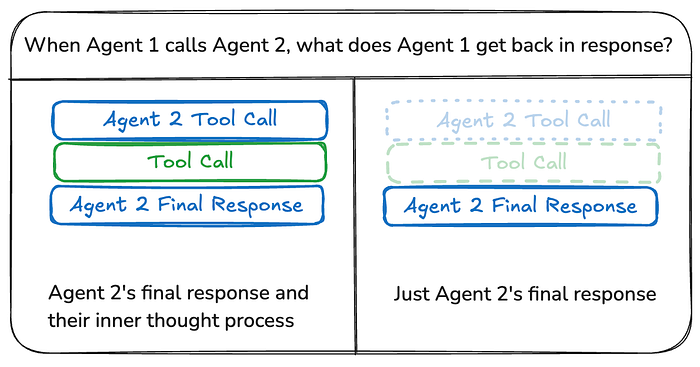

**Share full history**
Các tác nhân có thể chia sẻ toàn bộ lịch sử suy nghĩ (xử lý) của mình (tức là scratchpad) với tất cả các tác nhân khác. scratchpad này thường trông giống như một danh sách các thông điệp. 
- Lợi ích của việc chia sẻ toàn bộ quá trình suy nghĩ là nó có thể giúp các tác nhân khác đưa ra quyết định tốt hơn và cải thiện khả năng lập luận cho toàn bộ hệ thống.
- Nhược điểm: Khi số lượng tác nhân và độ phức tạp của chúng tăng lên, scratchpad nhanh chóng phình to và có thể yêu cầu chiến lược bổ sung để quản lý bộ nhớ.

**Share final result**
Tác nhân có thể có scratchpad riêng và chia sẻ kết quả cuối cùng với các tác nhân còn lại. cách tiếp cận này có thể hiệu quả đối với hệ thống có nhiều tác nhân hoặc hệ thống tác nhân/tác nhân phức tạp hơn. Trong trường hợp này, cần định nghĩa tác nhân với các lược đồ khác nhau.

# 4. Conclusion


Các hệ thống LLM đa tác nhân cung cấp một mô hình mạnh mẽ để giải quyết các nhiệm vụ phức tạp, bằng cách tận dụng các mô hình kiến trúc đa dạng như quy trình làm việc song song, tuần tự, định tuyến và tổng hợp như đã được trình bày.

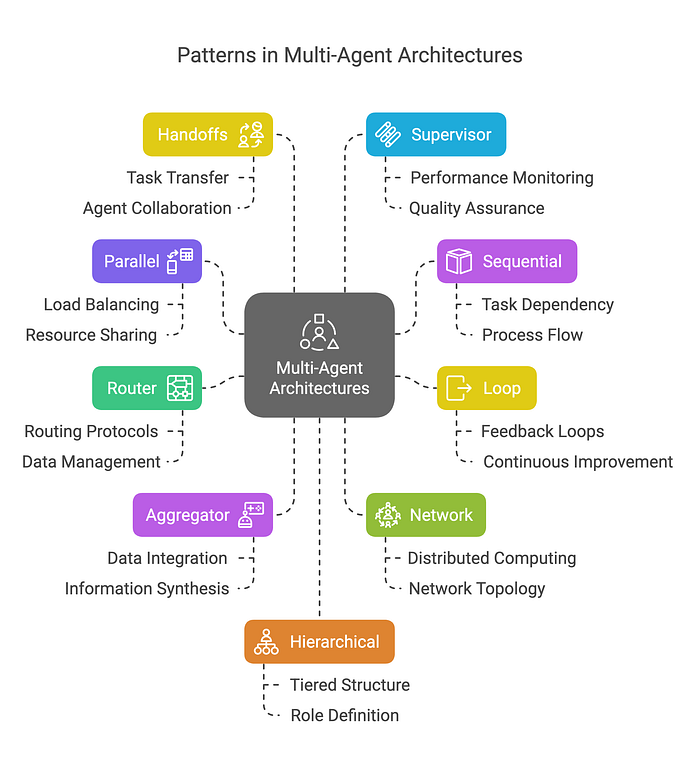

Thông qua việc kiểm tra chi tiết các cơ chế giao tiếp như trạng thái chia sẻ, danh sách tin nhắn và lệnh gọi công cụ, chúng ta có thể thấy cách các tác nhân cộng tác để đạt được sự phối hợp liền mạch.